In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement des données et Normalisation

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

trainset: (60000, 28, 28)
testset: (10000, 28, 28)


# 2. Visualisation des données

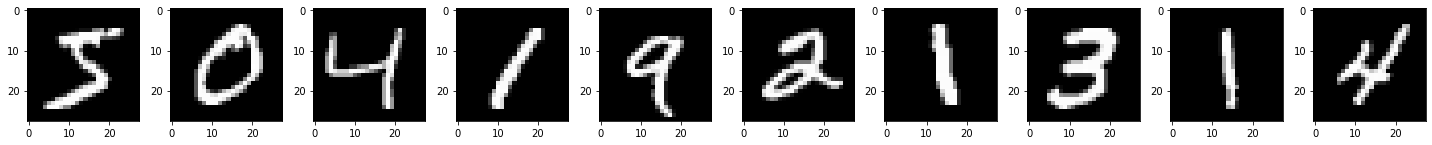

In [4]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

# 3. Configuration des Couches du Réseau de Neurones

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
# Configuration des couches du réseau
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128 , activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 4. Entrainement du Réseau de Neurones

In [8]:
# Compilation du modele
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Entrainement du modele
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.2631 - accuracy: 0.9242 - val_loss: 0.1183 - val_accuracy: 0.9658
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1056 - accuracy: 0.9683 - val_loss: 0.1089 - val_accuracy: 0.9658
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.0865 - val_accuracy: 0.9715
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0549 - accuracy: 0.9827 - val_loss: 0.0798 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.0847 - val_accuracy: 0.9750
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0707 - val_accuracy: 0.9791
Epoch 

# 5. Évaluation

In [10]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9962
Training Accuracy: 0.9962


In [11]:
loss_val, accuracy_val = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

313/313 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9778
Testing Accuracy:  0.9778


Text(0.5, 1.0, 'Accuracy Curves')

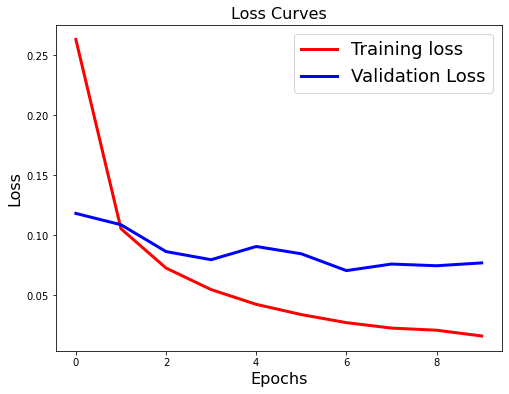

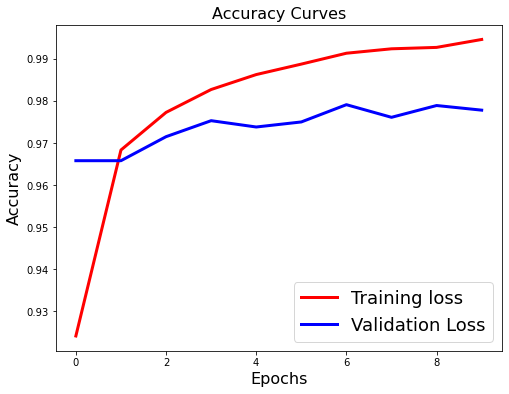

In [12]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r', linewidth=3.0)
plt.plot(history.history['val_loss'],'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs' ,fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accurancy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs' ,fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)